In [1]:
#Import Necessary  Libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Vaccine.csv"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Save the content to a file
with open("Vaccine.csv", "wb") as file:
    file.write(response.content)

In [3]:
# Data Loading from CSV files via Pandas
df = pd.read_csv("E:/DATA SCIENCE - COURSE - GUVI/New folder/Vaccine.csv")

# Display initial data summary
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [5]:
df.shape

(26707, 34)

In [6]:
# Basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths  

In [7]:
# Drop unnecessary columns
df.drop(['unique_id'], inplace = True, axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [9]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
# Check Null Values
count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
data = pd.concat([count, percent], axis=1,keys=['count','percent'])
miss = df.isnull().sum().sum()
print(data)
print("Grand Total of Missing Values: ",miss)


                           count    percent
has_health_insur           12274  45.957989
income_level                4423  16.561201
dr_recc_h1n1_vacc           2160   8.087767
dr_recc_seasonal_vacc       2160   8.087767
housing_status              2042   7.645936
employment                  1463   5.477965
marital_status              1408   5.272026
qualification               1407   5.268282
chronic_medic_condition      971   3.635751
cont_child_undr_6_mnths      820   3.070356
is_health_worker             804   3.010447
sick_from_seas_vacc          537   2.010709
is_seas_risky                514   1.924589
is_seas_vacc_effective       462   1.729884
sick_from_h1n1_vacc          395   1.479013
is_h1n1_vacc_effective       391   1.464036
is_h1n1_risky                388   1.452803
no_of_adults                 249   0.932340
no_of_children               249   0.932340
contact_avoidance            208   0.778822
avoid_touch_face             128   0.479275
h1n1_awareness               116

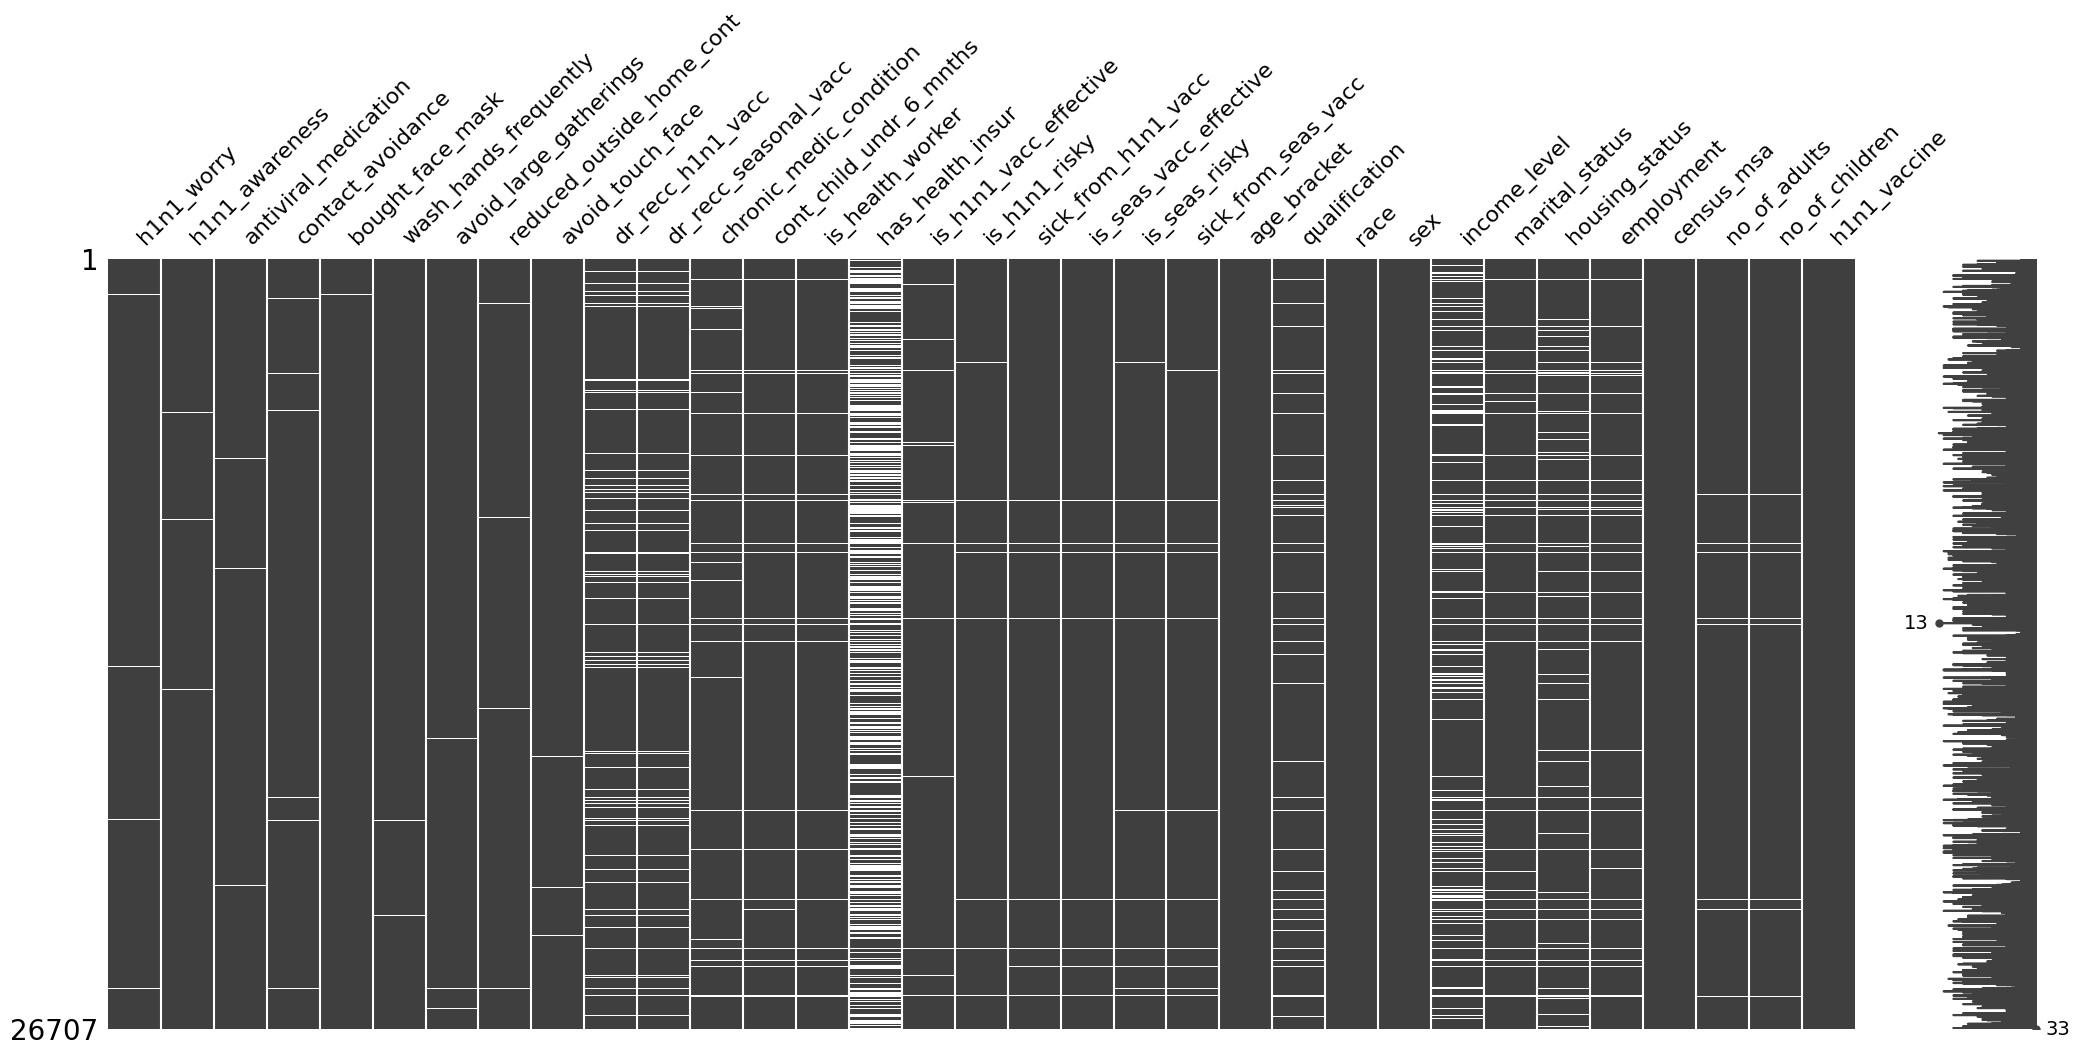

In [11]:
# Visualize the missingness
msno.matrix(df)
plt.show()

In [12]:
#Find the Mode and Median 
Mode = df['h1n1_worry'].mode()
Median = df['h1n1_worry'].median()
print("Mode:",Mode, "\nMedian:", Median)

Mode: 0    2.0
Name: h1n1_worry, dtype: float64 
Median: 2.0


In [13]:

# 0.Filling 92 missing values by mode (1)
df.fillna({'h1n1_worry': df['h1n1_worry'].mode()[0]}, inplace=True)

# 1.Filling 116 missing values by mode (2)
df.fillna({'h1n1_awareness':df['h1n1_awareness'].mode()[0]}, inplace=True)

# 2.Filling 71 missing values by mode (3)
df.fillna({'antiviral_medication': df['antiviral_medication'].mode()[0]}, inplace = True)

# 3.Filling 208 missing values by mode (4)
df.fillna({'contact_avoidance': df['contact_avoidance'].mode()[0]},inplace = True)

# 4.Filling 19 missing values by mode (5)
df.fillna({'bought_face_mask': df['bought_face_mask'].mode()[0]},inplace = True)

# 5.Filling 42 missing values by mode (6)
df.fillna({'wash_hands_frequently': df['wash_hands_frequently'].mode()[0]},inplace = True)

# 6.Filling 87 missing values by mode (7)
df.fillna({'avoid_large_gatherings': df['avoid_large_gatherings'].mode()[0]},inplace = True)

# 7.Filling 82 missing values by mode (8)
df.fillna({'reduced_outside_home_cont': df['reduced_outside_home_cont'].mode()[0]},inplace = True)

# 8.Filling 128 missing values by mode (9)
df.fillna({'avoid_touch_face': df['avoid_touch_face'].mode()[0]},inplace = True)

# 9.Filling 2160 missing values by mode (10)
df.fillna({'dr_recc_h1n1_vacc': df['dr_recc_h1n1_vacc'].mode()[0]},inplace = True)

# 10.Filling 2160 missing values by mode (11)
df.fillna({'dr_recc_seasonal_vacc': df['dr_recc_seasonal_vacc'].mode()[0]},inplace = True)

# 11.Filling 971 missing values by mode (12)
df.fillna({'chronic_medic_condition': df['chronic_medic_condition'].mode()[0]},inplace = True)

# 12.Filling 820 missing values by mode (13)
df.fillna({'cont_child_undr_6_mnths': df['cont_child_undr_6_mnths'].mode()[0]},inplace = True)

# 13.Filling 804 missing values by mode (14)
df.fillna({'is_health_worker': df['is_health_worker'].mode()[0]},inplace = True)

# 14.Filling 2160 missing values by mode (15)
df.fillna({'has_health_insur':df['has_health_insur'].mode()[0]},inplace = True)

# 15.Filling 391 missing values by mode (16)
df.fillna({'is_h1n1_vacc_effective': df['is_h1n1_vacc_effective'].mode()[0]},inplace = True)

# 16.Filling 388 missing values by mode (17)
df.fillna({'is_h1n1_risky': df['is_h1n1_risky'].mode()[0]},inplace = True)

# 17.Filling 395 missing values by mode (18)
df.fillna({'sick_from_h1n1_vacc': df['sick_from_h1n1_vacc'].mode()[0]},inplace = True)

# 18.Filling 462 missing values by mode (19)
df.fillna({'is_seas_vacc_effective': df['is_seas_vacc_effective'].mode()[0]},inplace = True)

# 19.Filling 514 missing values by mode (20)
df.fillna({'is_seas_risky': df['is_seas_risky'].mode()[0]},inplace = True)

# 20.Filling 537 missing values by mode (21)
df.fillna({'sick_from_seas_vacc': df['sick_from_seas_vacc'].mode()[0]},inplace = True)

# 22.Filling 1407 missing values by mode (23)
df.fillna({'qualification': df['qualification'].mode()[0]},inplace = True)

# 25.Filling 4423 missing values by mode  
df.fillna({'income_level':df['income_level'].mode()[0]},inplace = True) 

# 26.Filling 1408 missing values by mode (27)
df.fillna({'marital_status': df['marital_status'].mode()[0]},inplace = True)

# 27.Filling 2042 missing values by mode (28)
df.fillna({'housing_status': df['housing_status'].mode()[0]},inplace = True)

# 28.Filling 1463 missing values by mode (29)
df.fillna({'employment': df['employment'].mode()[0]},inplace = True)

# 30.Filling 249 missing values by mode (31)
df.fillna({'no_of_adults': df['no_of_adults'].mode()[0]},inplace = True)

# 31.Filling 249 missing values by mode (32)
df.fillna({'no_of_children': df['no_of_children'].mode()[0]},inplace = True)


# (21),(23),(24),(29),Non Null columns


In [14]:
print("\nProcessed Dataset Information:")
print(df.info())


Processed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_work

In [15]:
print(df['h1n1_worry'].value_counts())
print("0 = Not worried at all, 1 = Not very worried, 2 = Somewhat worried, 3 = Very worried")
print()  # Blank line for spacing

print(df['h1n1_awareness'].value_counts())
print("0 = No knowledge, 1 = little knowledge, 2 = good knowledge")
print()  # Blank line for spacing

print(df['antiviral_medication'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['contact_avoidance'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['bought_face_mask'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['wash_hands_frequently'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['avoid_large_gatherings'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['reduced_outside_home_cont'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['avoid_touch_face'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['dr_recc_h1n1_vacc'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['dr_recc_seasonal_vacc'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['chronic_medic_condition'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['cont_child_undr_6_mnths'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['is_health_worker'].value_counts())
print("0 = No, 1 = Yes")
print()  # Blank line for spacing

print(df['has_health_insur'].value_counts())
print("0 = No, 1 = Yes,2 = Unknow")
print()  # Blank line for spacing

print(df['is_h1n1_vacc_effective'].value_counts())
print("""1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not,
       4=Thinks it is somewhat effective, 5=Thinks it is highly effective""")
print()  # Blank line for spacing



print(df['is_h1n1_risky'].value_counts())
print("""1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 
      4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky""")
print()  # Blank line for spacing



print(df['sick_from_h1n1_vacc'].value_counts())
print("""1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know,
       4=Respondent is somewhat worried, 5Respondent is very worried""")
print()  # Blank line for spacing



print(df['is_seas_vacc_effective'].value_counts())
print("""1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 
      4=Thinks it is somewhat effective, 5=Thinks it is highly effective""")
print()  # Blank line for spacing


print(df['is_seas_risky'].value_counts())
print("""1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 
      4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky""")
print()  # Blank line for spacing



print(df['sick_from_seas_vacc'].value_counts())
print("""1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know,
       4=Respondent is somewhat worried, 5Respondent is very worried""")
print()  # Blank line for spacing


print(df['age_bracket'].value_counts())
df['age_bracket'].value_counts()
print()  # Blank line for spacing

print(df['qualification'].value_counts())
print()  # Blank line for spacing

print(df['race'].value_counts())
print()  # Blank line for spacing

print(df['sex'].value_counts())
print()  # Blank line for spacing

print(df['income_level'].value_counts())
print()  # Blank line for spacing

print(df['marital_status'].value_counts())
print()  # Blank line for spacing

print(df['housing_status'].value_counts())
print()  # Blank line for spacing

print(df['employment'].value_counts())
print()  # Blank line for spacing

print(df['census_msa'].value_counts())
print()  # Blank line for spacing

print(df['no_of_adults'].value_counts())
print()  # Blank line for spacing

print(df['no_of_children'].value_counts())
print()  # Blank line for spacing

print(df['h1n1_vaccine'].value_counts())
print("0 = No, 1 = Yes")


h1n1_worry
2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
0 = Not worried at all, 1 = Not very worried, 2 = Somewhat worried, 3 = Very worried

h1n1_awareness
1.0    14714
2.0     9487
0.0     2506
Name: count, dtype: int64
0 = No knowledge, 1 = little knowledge, 2 = good knowledge

antiviral_medication
0.0    25406
1.0     1301
Name: count, dtype: int64
0 = No, 1 = Yes

contact_avoidance
1.0    19436
0.0     7271
Name: count, dtype: int64
0 = No, 1 = Yes

bought_face_mask
0.0    24866
1.0     1841
Name: count, dtype: int64
0 = No, 1 = Yes

wash_hands_frequently
1.0    22057
0.0     4650
Name: count, dtype: int64
0 = No, 1 = Yes

avoid_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64
0 = No, 1 = Yes

reduced_outside_home_cont
0.0    17726
1.0     8981
Name: count, dtype: int64
0 = No, 1 = Yes

avoid_touch_face
1.0    18129
0.0     8578
Name: count, dtype: int64
0 = No, 1 = Yes

dr_recc_h1n1_vacc
0.0    21299
1.0     5408
Name: count, d

##### Countplot of categorical variables

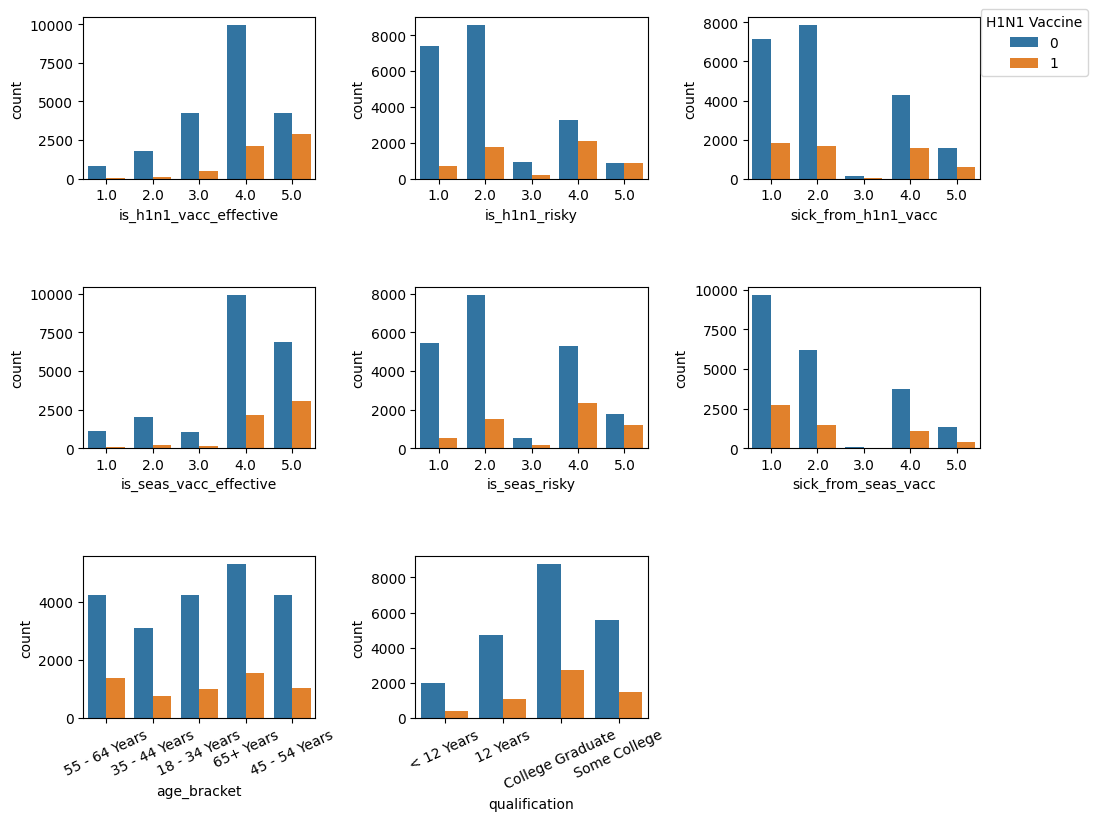

In [16]:
# Countplot of categorical variable

# Create a figure with a 4x3 grid of subplots
plt.figure(figsize=(10,10))

# Plot 1
plt.subplot(4,3,1)
sns.countplot(x=df.is_h1n1_vacc_effective, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend


# Plot 2
plt.subplot(4,3,2)
sns.countplot(x=df.is_h1n1_risky, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend


# Plot 3
plt.subplot(4,3,3)
sns.countplot(x=df.sick_from_h1n1_vacc, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend

# Plot 4
plt.subplot(4,3,4)
sns.countplot(x=df.is_seas_vacc_effective, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend


# Plot 5
plt.subplot(4,3,5)
sns.countplot(x=df.is_seas_risky, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend


# Plot 6
plt.subplot(4,3,6)
sns.countplot(x=df.sick_from_seas_vacc, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend

# Plot 7
plt.subplot(4,3,7)
sns.countplot(x=df.age_bracket, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend
plt.xticks(rotation=25)

# Plot 8
plt.subplot(4,3,8)
sns.countplot(x=df.qualification, hue=df.h1n1_vaccine)
plt.legend([], [], frameon=False)  # Remove the individual legend
plt.xticks(rotation=25)

# Add a common legend in the upper right corner
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title='H1N1 Vaccine', loc='upper right', bbox_to_anchor=(1.1, 1), ncol=1)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


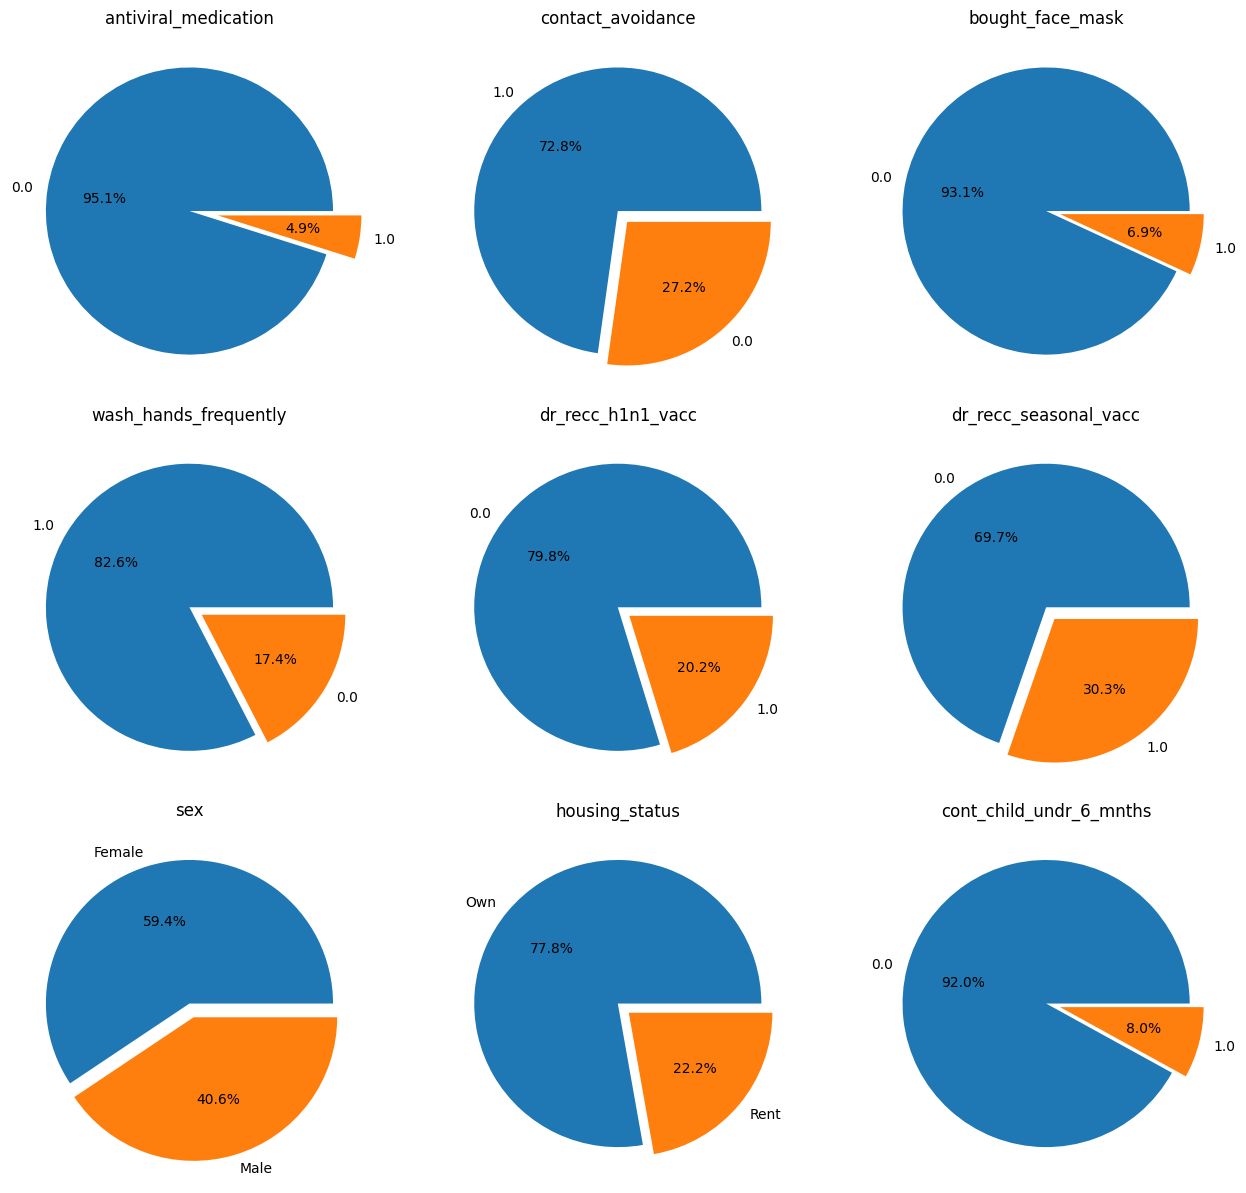

In [17]:
# Create a figure with a 4x3 grid of subplots
plt.figure(figsize=(13,16))

# Plot 1
plt.subplot(4,3,1)
df['antiviral_medication'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.2],title="antiviral_medication")
plt.ylabel('')  # To remove the default y-axis label


# Plot 2
plt.subplot(4,3,2)
df['contact_avoidance'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="contact_avoidance")
plt.ylabel('')  # To remove the default y-axis label

# Plot 3
plt.subplot(4,3,3)
df['bought_face_mask'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="bought_face_mask")
plt.ylabel('')  # To remove the default y-axis label

# Plot 4
plt.subplot(4,3,4)
df['wash_hands_frequently'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="wash_hands_frequently")
plt.ylabel('')  # To remove the default y-axis label

# Plot 5
plt.subplot(4,3,5)
df['dr_recc_h1n1_vacc'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="dr_recc_h1n1_vacc")
plt.ylabel('')  # To remove the default y-axis label

# Plot 6
plt.subplot(4,3,6)
df['dr_recc_seasonal_vacc'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="dr_recc_seasonal_vacc")
plt.ylabel('')  # To remove the default y-axis label

# Plot 7
plt.subplot(4,3,7)
df['sex'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="sex")
plt.ylabel('')  # To remove the default y-axis label

# Plot 8
plt.subplot(4,3,8)
df['housing_status'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="housing_status")
plt.ylabel('')  # To remove the default y-axis label

# Plot 9
plt.subplot(4,3,9)
df['cont_child_undr_6_mnths'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = [0,0.1],title="cont_child_undr_6_mnths")
plt.ylabel('')  # To remove the default y-axis label


# Adjust layout
plt.tight_layout() 

plt.show()

In [18]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_columns = df.select_dtypes('object').columns
column_indices = [df.columns.get_loc(col) for col in object_columns]

print(column_indices)

df.iloc[: ,[21, 22, 23, 24, 25, 26, 27, 28, 29]] = df.iloc[: ,[21, 22, 23, 24, 25, 26, 27, 28, 29]].apply(le.fit_transform)

[21, 22, 23, 24, 25, 26, 27, 28, 29]


In [19]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,2,1.0,0.0,0


In [20]:
df.to_csv('Vaccine_final.csv', index=False)

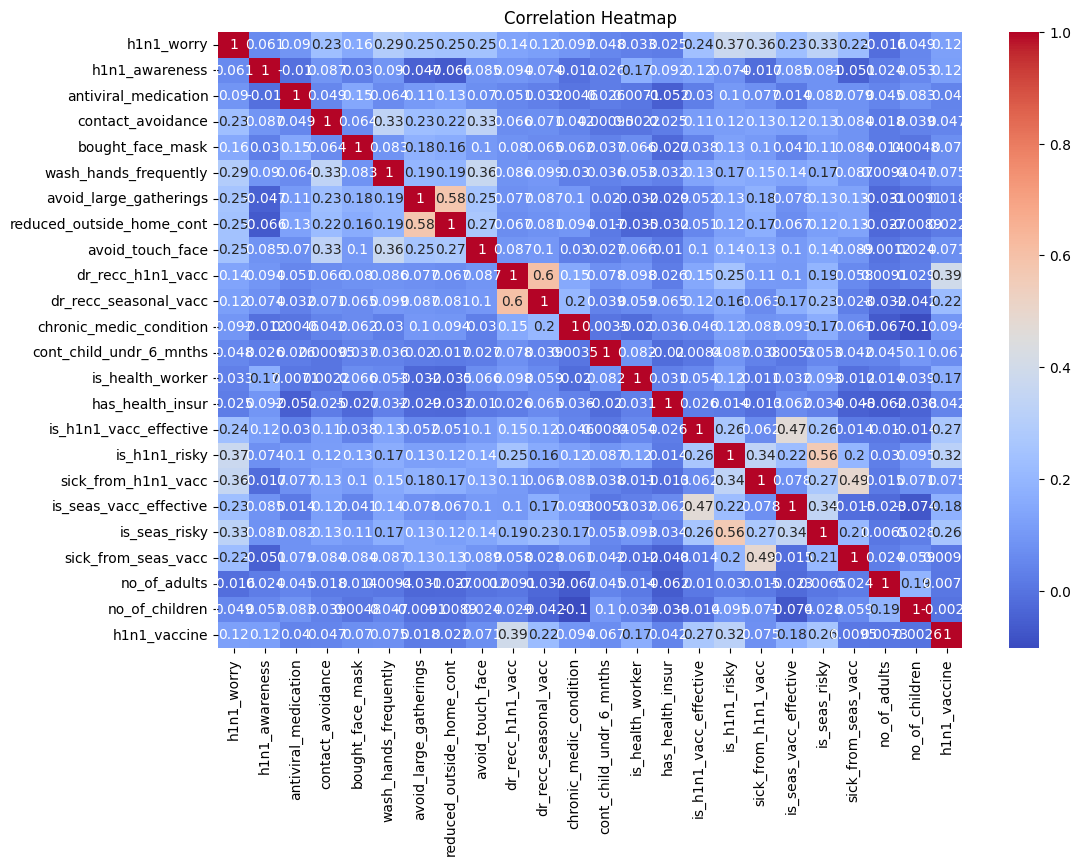

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

### MODEL 1 : IMBALANCED

In [22]:
#ASSISTING THE FEATURE AND TARGET
x1 = df.drop(columns='h1n1_vaccine')
y1 = df['h1n1_vaccine']
x1.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,1.0,0.0


In [23]:
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=42)
print('Shape of train_x is:',x1_train.shape)
print('Shape of train_y is:',y1_train.shape)
print('Shape of test_x is:',x1_test.shape)
print('Shape of test_y is:',y1_test.shape)

Shape of train_x is: (18694, 32)
Shape of train_y is: (18694,)
Shape of test_x is: (8013, 32)
Shape of test_y is: (8013,)


<Axes: ylabel='count'>

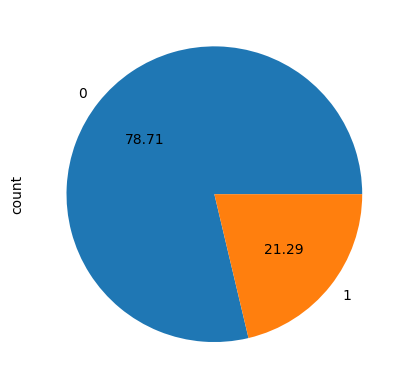

In [24]:
# Pie chart of the training set
y1_train.value_counts().plot.pie(autopct='%.2f')

In [25]:
y1_train.value_counts()

h1n1_vaccine
0    14714
1     3980
Name: count, dtype: int64

In [26]:
y1_test.value_counts()

h1n1_vaccine
0    6319
1    1694
Name: count, dtype: int64

In [27]:
# TRAIN THE DATASET
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(x1_train,y1_train)

LogisticRegression(max_iter=10000)

In [28]:
y_predict= model.predict(x1_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print('Train accuracy is',model.score(x1_train, y1_train))
print('Test accuracy is',model.score(x1_test, y1_test))

Train accuracy is 0.8358296779715416
Test accuracy is 0.8380132285036815


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_test,y_predict))
pd.crosstab(y1_test,y_predict)

0.8380132285036815


col_0,0,1
h1n1_vaccine,,
0,6014,305
1,993,701


In [31]:
model.predict_proba(x1_test) 

array([[0.92204173, 0.07795827],
       [0.92837247, 0.07162753],
       [0.93764866, 0.06235134],
       ...,
       [0.99569946, 0.00430054],
       [0.97728248, 0.02271752],
       [0.89642974, 0.10357026]])

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define function to get predictions based on threshold
def predict_threshold(model, X_test, threshold):
    return np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)

# Initialize variables to keep track of the best threshold and highest average score
best_threshold = 0.0
best_average_score = 0.0
metrics_summary = []

# Loop through thresholds from 0 to 1.0 in increments of 0.1
for thr in np.arange(0, 1.0, 0.1):
    y_predict = predict_threshold(model, x1_test, thr)
    
    # Calculate metrics
    precision = precision_score(y1_test, y_predict)
    recall = recall_score(y1_test, y_predict)
    f1 = f1_score(y1_test, y_predict)
    accuracy = accuracy_score(y1_test, y_predict)
    
    # Calculate average score for comparison (or use a custom scoring approach if desired)
    average_score = np.mean([precision, recall, f1, accuracy])
    
    # Save the metrics for each threshold to inspect later if needed
    metrics_summary.append((thr, precision, recall, f1, accuracy))
    
    print(f"\nThreshold: {thr}")
    print("Confusion Matrix:\n", confusion_matrix(y1_test, y_predict))
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}")

    # Update the best threshold based on the highest average score
    if average_score > best_average_score:
        best_average_score = average_score
        best_threshold = thr

print(f"\nBest threshold based on balanced metrics: {best_threshold}")
print(f"Best Average Score: {best_average_score}")

# Final predictions with the best threshold
y_final_predict = np.where(model.predict_proba(x1_test)[:, 1] > best_threshold, 1, 0)




Threshold: 0.0
Confusion Matrix:
 [[   0 6319]
 [   0 1694]]
Precision: 0.21140646449519532, Recall: 1.0, F1 Score: 0.3490264757391573, Accuracy: 0.21140646449519532

Threshold: 0.1
Confusion Matrix:
 [[3260 3059]
 [ 202 1492]]
Precision: 0.3278400351571083, Recall: 0.8807556080283353, F1 Score: 0.477822257806245, Accuracy: 0.593036315986522

Threshold: 0.2
Confusion Matrix:
 [[4889 1430]
 [ 472 1222]]
Precision: 0.46078431372549017, Recall: 0.7213695395513577, F1 Score: 0.5623561895996319, Accuracy: 0.7626357169599401

Threshold: 0.30000000000000004
Confusion Matrix:
 [[5498  821]
 [ 656 1038]]
Precision: 0.558364712210866, Recall: 0.6127508854781583, F1 Score: 0.5842949620039404, Accuracy: 0.8156745288905528

Threshold: 0.4
Confusion Matrix:
 [[5819  500]
 [ 817  877]]
Precision: 0.6368917937545389, Recall: 0.5177095631641087, F1 Score: 0.5711494627157278, Accuracy: 0.8356420816173717

Threshold: 0.5
Confusion Matrix:
 [[6014  305]
 [ 993  701]]
Precision: 0.6968190854870775, Recall

In [33]:
# Final evaluation of chosen threshold
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score

print("\nFinal Evaluation with Best Threshold:")
print("Confusion Matrix:\n", confusion_matrix(y1_test, y_final_predict))
print(f"Precision: {precision_score(y1_test, y_final_predict)}")
print(f"Recall: {recall_score(y1_test, y_final_predict)}")
print(f"F1 Score: {f1_score(y1_test, y_final_predict)}")
print(f"Accuracy: {accuracy_score(y1_test, y_final_predict)}")
print('\nClassification Report:\n', classification_report(y1_test, y_final_predict))


Final Evaluation with Best Threshold:
Confusion Matrix:
 [[5498  821]
 [ 656 1038]]
Precision: 0.558364712210866
Recall: 0.6127508854781583
F1 Score: 0.5842949620039404
Accuracy: 0.8156745288905528

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6319
           1       0.56      0.61      0.58      1694

    accuracy                           0.82      8013
   macro avg       0.73      0.74      0.73      8013
weighted avg       0.82      0.82      0.82      8013



In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities
y_probabilities = model.predict_proba(x1_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y1_test, y_probabilities)

# Calculate the AUC score
roc_auc = roc_auc_score(y1_test, y_probabilities)

roc_auc

0.8217193400910617

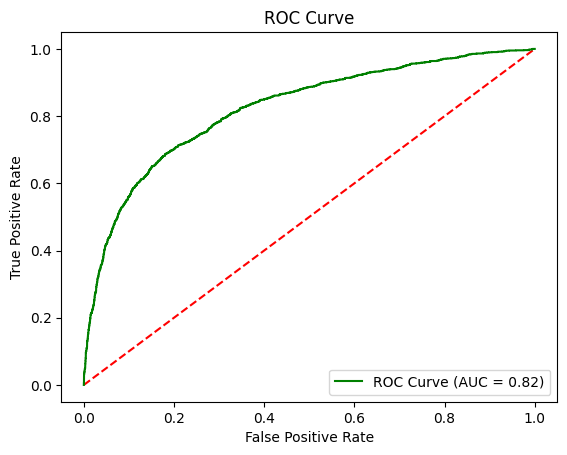

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, y_probabilities)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### MODEL 2 : UNDERSAMPLING

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='h1n1_vaccine')  # Replace 'target_column' with your actual target column
Y = df['h1n1_vaccine']

# Create the model
model = LogisticRegression(max_iter=10000)
rfe_selector = RFE(model, n_features_to_select=15) 
rfe_selector.fit(X, Y)

# Get selected features
selected_features = X.columns[rfe_selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['h1n1_worry', 'h1n1_awareness', 'bought_face_mask',
       'avoid_large_gatherings', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_risky',
       'age_bracket', 'sex', 'marital_status'],
      dtype='object')


In [37]:
#ASSISTING THE FEATURE AND TARGET
x2 = X[selected_features]
y2 = df['h1n1_vaccine']
x2.head()


,h1n1_worry,h1n1_awareness,bought_face_mask,avoid_large_gatherings,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_risky,age_bracket,sex,marital_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,3,0,1
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,1,1,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0,1,1
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,4.0,4,0,1
4,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2,0,0


In [38]:
x2.shape

(26707, 15)

In [39]:
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.3,random_state=42)
print('Shape of train_x is:',x2_train.shape)
print('Shape of train_y is:',y2_train.shape)
print('Shape of test_x is:',x2_test.shape)
print('Shape of test_y is:',y2_test.shape)

Shape of train_x is: (18694, 15)
Shape of train_y is: (18694,)
Shape of test_x is: (8013, 15)
Shape of test_y is: (8013,)


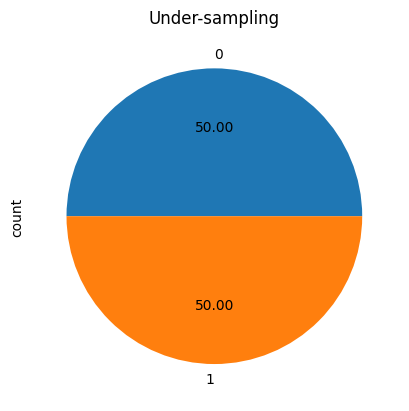

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_train_rus, y_train_rus = rus.fit_resample(x2_train, y2_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [41]:
x_train_rus.shape

(7960, 15)

In [42]:
# Class distribution
y_train_rus.value_counts()

h1n1_vaccine
0    3980
1    3980
Name: count, dtype: int64

In [43]:
# TRAIN THE DATASET
from sklearn.linear_model import LogisticRegression
model_rus = LogisticRegression(max_iter=10000)
model_rus.fit(x_train_rus,y_train_rus)

LogisticRegression(max_iter=10000)

In [44]:
y_predict_rus= model_rus.predict(x2_test)
y_predict_rus

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
print('Train accuracy is',model_rus.score(x_train_rus, y_train_rus))
print('Test accuracy is',model_rus.score(x2_test, y2_test))

Train accuracy is 0.760929648241206
Test accuracy is 0.7737426681642331


In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y2_test,y_predict_rus))
pd.crosstab(y2_test,y_predict_rus)

0.7737426681642331


col_0,0,1
h1n1_vaccine,,
0,4995,1324
1,489,1205


In [47]:
model_rus.predict_proba(x2_test) 

array([[0.7832537 , 0.2167463 ],
       [0.75719198, 0.24280802],
       [0.82693608, 0.17306392],
       ...,
       [0.98679504, 0.01320496],
       [0.93273693, 0.06726307],
       [0.71515541, 0.28484459]])

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define function to get predictions based on threshold
def predict_threshold_rus(model, x_test, threshold):
    return np.where(model.predict_proba(x_test)[:, 1] > threshold, 1, 0)

# Initialize variables to keep track of the best threshold and highest average score
best_threshold_rus = 0.0
best_average_score_rus = 0.0
metrics_summary_rus = []

# Loop through thresholds from 0 to 1.0 in increments of 0.1
for thr_rus in np.arange(0, 1.0, 0.1):
    y_predict_rus = predict_threshold_rus(model_rus, x2_test, thr_rus)
    
    # Calculate metrics
    precision_rus = precision_score(y2_test, y_predict_rus)
    recall_rus = recall_score(y2_test, y_predict_rus)
    f1_rus = f1_score(y2_test, y_predict_rus)
    accuracy_rus = accuracy_score(y2_test, y_predict_rus)
    
    # Calculate average score for comparison (or use a custom scoring approach if desired)
    average_score_rus = np.mean([precision_rus, recall_rus, f1_rus, accuracy_rus])
    
    # Save the metrics for each threshold to inspect later if needed
    metrics_summary_rus.append((thr_rus, precision_rus, recall_rus, f1_rus, accuracy_rus))
    
    print(f"\nThreshold: {thr_rus}")
    print("Confusion Matrix:\n", confusion_matrix(y2_test, y_predict_rus))
    print(f"Precision: {precision_rus}, Recall: {recall_rus}, F1 Score: {f1_rus}, Accuracy: {accuracy_rus}")

    # Update the best threshold based on the highest average score
    if average_score_rus > best_average_score_rus:
        best_average_score_rus = average_score_rus
        best_threshold_rus = thr_rus

print(f"\nBest threshold based on balanced metrics: {best_threshold_rus}")
print(f"Best Average Score: {best_average_score_rus}")

# Final predictions with the best threshold
y_final_predict_rus = np.where(model_rus.predict_proba(x2_test)[:, 1] > best_threshold_rus, 1, 0)




Threshold: 0.0
Confusion Matrix:
 [[   0 6319]
 [   0 1694]]
Precision: 0.21140646449519532, Recall: 1.0, F1 Score: 0.3490264757391573, Accuracy: 0.21140646449519532

Threshold: 0.1
Confusion Matrix:
 [[ 734 5585]
 [  19 1675]]
Precision: 0.23071625344352617, Recall: 0.9887839433293979, F1 Score: 0.37413446504355596, Accuracy: 0.3006364657431674

Threshold: 0.2
Confusion Matrix:
 [[2041 4278]
 [  97 1597]]
Precision: 0.27182978723404255, Recall: 0.9427390791027155, F1 Score: 0.42198441009380366, Accuracy: 0.4540122301260452

Threshold: 0.30000000000000004
Confusion Matrix:
 [[3454 2865]
 [ 210 1484]]
Precision: 0.3412278684755116, Recall: 0.8760330578512396, F1 Score: 0.4911467813999669, Accuracy: 0.6162485960314489

Threshold: 0.4
Confusion Matrix:
 [[4359 1960]
 [ 354 1340]]
Precision: 0.40606060606060607, Recall: 0.7910271546635183, F1 Score: 0.5366439727673208, Accuracy: 0.7112192686883814

Threshold: 0.5
Confusion Matrix:
 [[4995 1324]
 [ 489 1205]]
Precision: 0.4764729141953341,

In [49]:
# Final evaluation of chosen threshold
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score

print("\nFinal Evaluation with Best Threshold:")
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_final_predict_rus))
print(f"Precision: {precision_score(y2_test, y_final_predict_rus)}")
print(f"Recall: {recall_score(y2_test, y_final_predict_rus)}")
print(f"F1 Score: {f1_score(y2_test, y_final_predict_rus)}")
print(f"Accuracy: {accuracy_score(y2_test, y_final_predict_rus)}")
print('\nClassification Report:\n', classification_report(y2_test, y_final_predict_rus))


Final Evaluation with Best Threshold:
Confusion Matrix:
 [[5416  903]
 [ 625 1069]]
Precision: 0.5420892494929006
Recall: 0.6310507674144038
F1 Score: 0.5831969448990726
Accuracy: 0.8093098714588793

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6319
           1       0.54      0.63      0.58      1694

    accuracy                           0.81      8013
   macro avg       0.72      0.74      0.73      8013
weighted avg       0.82      0.81      0.81      8013



In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities
y_probabilities_rus = model_rus.predict_proba(x2_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y2_test, y_probabilities_rus)

# Calculate the AUC score
roc_auc_rus = roc_auc_score(y2_test, y_probabilities_rus)

roc_auc_rus

0.8230835472487632

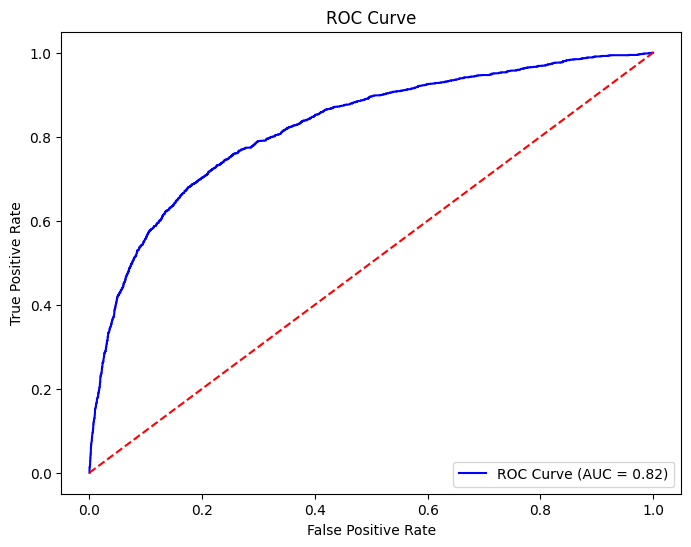

In [51]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, color='blue', label=f'ROC Curve (AUC = {roc_auc_rus:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### MODEL 3: OVERSAMPLING

In [52]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [53]:
selected_columns = [
    'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 
    'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 
    'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 
    'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 
    'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 
    'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 
    'is_seas_risky', 'sick_from_seas_vacc']

df3 = df[selected_columns]
df3.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0


In [54]:
x3 = df3
y3 = df['h1n1_vaccine']
x3.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0


In [55]:
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.3,random_state=42)
print('Shape of train_x is:',x3_train.shape)
print('Shape of train_y is:',y3_train.shape)
print('Shape of test_x is:',x3_test.shape)
print('Shape of test_y is:',y3_test.shape)

Shape of train_x is: (18694, 21)
Shape of train_y is: (18694,)
Shape of test_x is: (8013, 21)
Shape of test_y is: (8013,)


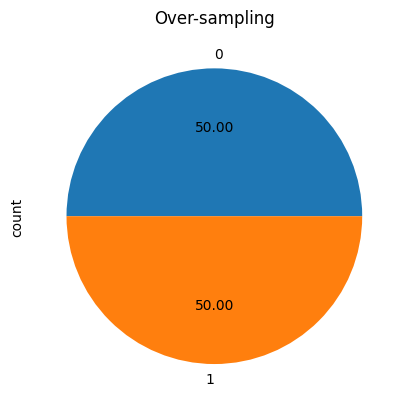

In [56]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # Float
#ros = RandomOverSampler(sampling_strategy="not majority") # String
x_train_ros, y_train_ros = ros.fit_resample(x3_train, y3_train)

bx = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = bx.set_title("Over-sampling")

In [57]:
print(y_train_ros.shape)
print(x_train_ros.shape)

(29428,)
(29428, 21)


In [58]:
# Class distribution
y_train_ros.value_counts()

h1n1_vaccine
0    14714
1    14714
Name: count, dtype: int64

In [59]:
# TRAIN THE DATASET
from sklearn.linear_model import LogisticRegression
model_ros = LogisticRegression(max_iter=10000)
model_ros.fit(x_train_ros,y_train_ros)

LogisticRegression(max_iter=10000)

In [60]:
y_predict_ros= model_ros.predict(x3_test)
y_predict_ros

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
print('Train accuracy is',model_ros.score(x_train_ros, y_train_ros))
print('Test accuracy is',model_ros.score(x3_test, y3_test))

Train accuracy is 0.7585292918309093
Test accuracy is 0.7729938849369774


In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y3_test,y_predict_ros))
pd.crosstab(y3_test,y_predict_ros)

0.7729938849369774


col_0,0,1
h1n1_vaccine,,
0,4993,1326
1,493,1201


In [63]:
model_ros.predict_proba(x3_test) 

array([[0.71172236, 0.28827764],
       [0.76255513, 0.23744487],
       [0.76538665, 0.23461335],
       ...,
       [0.97491822, 0.02508178],
       [0.91299229, 0.08700771],
       [0.76998268, 0.23001732]])

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define function to get predictions based on threshold
def predict_threshold_ros(model, x_test, threshold):
    return np.where(model.predict_proba(x_test)[:, 1] > threshold, 1, 0)

# Initialize variables to keep track of the best threshold and highest average score
best_threshold_ros = 0.0
best_average_score_ros = 0.0
metrics_summary_ros = []

# Loop through thresholds from 0 to 1.0 in increments of 0.1
for thr_ros in np.arange(0, 1.0, 0.1):
    y_predict_ros = predict_threshold_ros(model_ros, x3_test, thr_ros)
    
    # Calculate metrics
    precision_ros = precision_score(y3_test, y_predict_ros)
    recall_ros = recall_score(y3_test, y_predict_ros)
    f1_ros = f1_score(y3_test, y_predict_ros)
    accuracy_ros = accuracy_score(y3_test, y_predict_ros)
    
    # Calculate average score for comparison (or use a custom scoring approach if desired)
    average_score_ros = np.mean([precision_ros, recall_ros, f1_ros, accuracy_ros])
    
    # Save the metrics for each threshold to inspect later if needed
    metrics_summary_ros.append((thr_ros, precision_ros, recall_ros, f1_ros, accuracy_ros))
    
    print(f"\nThreshold: {thr_ros}")
    print("Confusion Matrix:\n", confusion_matrix(y3_test, y_predict_ros))
    print(f"Precision: {precision_ros}, Recall: {recall_ros}, F1 Score: {f1_ros}, Accuracy: {accuracy_ros}")

    # Update the best threshold based on the highest average score
    if average_score_ros > best_average_score_ros:
        best_average_score_ros = average_score_ros
        best_threshold_ros = thr_ros

print(f"\nBest threshold based on balanced metrics: {best_threshold_ros}")
print(f"Best Average Score: {best_average_score_ros}")

# Final predictions with the best threshold
y_final_predict_ros = np.where(model_ros.predict_proba(x3_test)[:, 1] > best_threshold_ros, 1, 0)




Threshold: 0.0
Confusion Matrix:
 [[   0 6319]
 [   0 1694]]
Precision: 0.21140646449519532, Recall: 1.0, F1 Score: 0.3490264757391573, Accuracy: 0.21140646449519532

Threshold: 0.1
Confusion Matrix:
 [[ 706 5613]
 [  16 1678]]
Precision: 0.23014675627485942, Recall: 0.9905548996458088, F1 Score: 0.373511407902059, Accuracy: 0.2975165356296019

Threshold: 0.2
Confusion Matrix:
 [[1925 4394]
 [  93 1601]]
Precision: 0.2670558798999166, Recall: 0.9451003541912633, F1 Score: 0.4164390687995838, Accuracy: 0.44003494321727193

Threshold: 0.30000000000000004
Confusion Matrix:
 [[3409 2910]
 [ 221 1473]]
Precision: 0.33607118412046544, Recall: 0.8695395513577332, F1 Score: 0.48477867368767485, Accuracy: 0.6092599525770622

Threshold: 0.4
Confusion Matrix:
 [[4362 1957]
 [ 364 1330]]
Precision: 0.4046242774566474, Recall: 0.7851239669421488, F1 Score: 0.5340293113832564, Accuracy: 0.7103456882565831

Threshold: 0.5
Confusion Matrix:
 [[4993 1326]
 [ 493 1201]]
Precision: 0.4752671151563118, R

In [65]:
# Final evaluation of chosen threshold
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score

print("\nFinal Evaluation with Best Threshold:")
print("Confusion Matrix:\n", confusion_matrix(y3_test, y_final_predict_ros))
print(f"Precision: {precision_score(y3_test, y_final_predict_ros)}")
print(f"Recall: {recall_score(y3_test, y_final_predict_ros)}")
print(f"F1 Score: {f1_score(y3_test, y_final_predict_ros)}")
print(f"Accuracy: {accuracy_score(y3_test, y_final_predict_ros)}")
print('\nClassification Report:\n', classification_report(y3_test, y_final_predict_ros))


Final Evaluation with Best Threshold:
Confusion Matrix:
 [[5425  894]
 [ 631 1063]]
Precision: 0.543178334184977
Recall: 0.627508854781582
F1 Score: 0.5823062174746645
Accuracy: 0.8096842630725072

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6319
           1       0.54      0.63      0.58      1694

    accuracy                           0.81      8013
   macro avg       0.72      0.74      0.73      8013
weighted avg       0.82      0.81      0.81      8013



In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities
y_probabilities_ros = model_ros.predict_proba(x3_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y3_test, y_probabilities_ros)

# Calculate the AUC score
roc_auc_ros = roc_auc_score(y3_test, y_probabilities_ros)

roc_auc_ros

0.8199969619929625

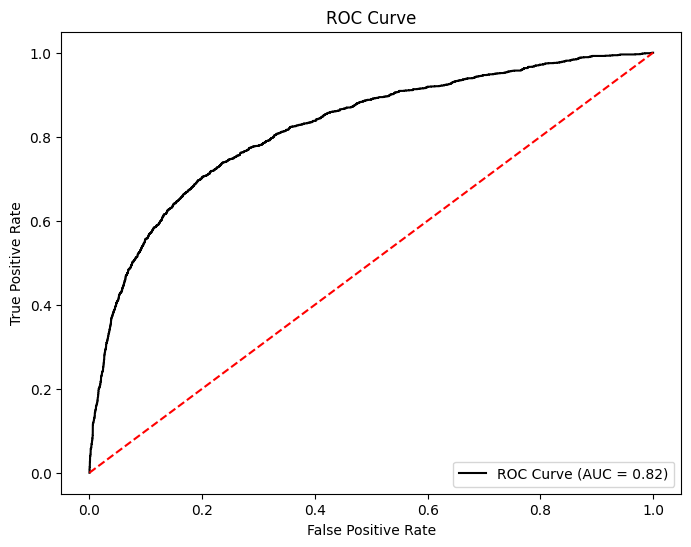

In [67]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y3_test, y_probabilities_ros)
plt.plot(fpr_ros, tpr_ros, color='black', label=f'ROC Curve (AUC = {roc_auc_ros:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### MODEL 4: SMOTE

In [68]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,2,1.0,0.0,0


In [69]:
x4 = df.drop(columns='h1n1_vaccine')
y4 = df['h1n1_vaccine']
x4.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,1.0,0.0


In [70]:
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.3,random_state=42)
print('Shape of train_x is:',x4_train.shape)
print('Shape of train_y is:',y4_train.shape)
print('Shape of test_x is:',x4_test.shape)
print('Shape of test_y is:',y4_test.shape)

Shape of train_x is: (18694, 32)
Shape of train_y is: (18694,)
Shape of test_x is: (8013, 32)
Shape of test_y is: (8013,)


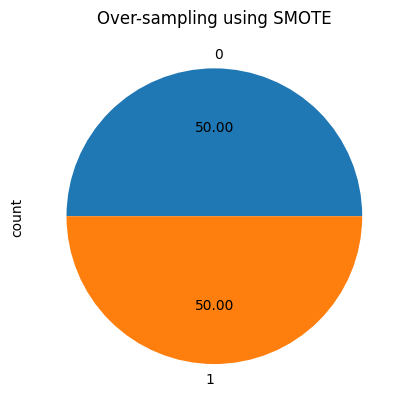

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)  # Create an instance of SMOTE

x_train_smote, y_train_smote = smote.fit_resample(x4_train, y4_train)  # Apply SMOTE

# You can check the class distribution after applying SMOTE
cx = y_train_smote.value_counts().plot.pie(autopct='%.2f')
_ = cx.set_title("Over-sampling using SMOTE")

In [72]:
print(y_train_smote.shape)
print(x_train_smote.shape)

(29428,)
(29428, 32)


In [73]:
# TRAIN THE DATASET
from sklearn.linear_model import LogisticRegression
model_smote = LogisticRegression(max_iter=10000, random_state=42)
model_smote.fit(x_train_smote,y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [74]:
y_predict_smote= model_smote.predict(x4_test)
y_predict_smote

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
print('Train accuracy is',model_smote.score(x_train_smote, y_train_smote))
print('Test accuracy is',model_smote.score(x4_test, y4_test))

Train accuracy is 0.7705926328666576
Test accuracy is 0.7789841507550231


In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y4_test,y_predict_smote))
pd.crosstab(y4_test,y_predict_smote)

0.7789841507550231


col_0,0,1
h1n1_vaccine,,
0,5043,1276
1,495,1199


In [77]:
model_smote.predict_proba(x4_test) 

array([[0.75740868, 0.24259132],
       [0.77870703, 0.22129297],
       [0.84962835, 0.15037165],
       ...,
       [0.99017993, 0.00982007],
       [0.93616693, 0.06383307],
       [0.73377259, 0.26622741]])

In [78]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Define function to get predictions based on threshold
def predict_threshold_smote(model, x_test, threshold):
    return np.where(model.predict_proba(x_test)[:, 1] > threshold, 1, 0)

# Initialize variables to keep track of the best threshold and highest average score
best_threshold_smote = 0.0
best_average_score_smote = 0.0
metrics_summary_smote = []

# Loop through thresholds from 0 to 1.0 in increments of 0.1
for thr_smote in np.arange(0, 1.0, 0.1):
    y_predict_smote = predict_threshold_smote(model_smote, x4_test, thr_smote)
    
    # Calculate metrics
    precision_smote = precision_score(y4_test, y_predict_smote)
    recall_smote = recall_score(y4_test, y_predict_smote)
    f1_smote = f1_score(y4_test, y_predict_smote)
    accuracy_smote = accuracy_score(y4_test, y_predict_smote)
    
    # Calculate average score for comparison (or use a custom scoring approach if desired)
    average_score_smote = np.mean([precision_smote, recall_smote, f1_smote, accuracy_smote])
    
    # Save the metrics for each threshold to inspect later if needed
    metrics_summary_smote.append((thr_smote, precision_smote, recall_smote, f1_smote, accuracy_smote))
    
    print(f"\nThreshold: {thr_smote}")
    print("Confusion Matrix:\n", confusion_matrix(y4_test, y_predict_smote))
    print(f"Precision: {precision_smote}, Recall: {recall_smote}, F1 Score: {f1_smote}, Accuracy: {accuracy_smote}")

    # Update the best threshold based on the highest average score
    if average_score_smote > best_average_score_smote:
        best_average_score_smote = average_score_smote
        best_threshold_smote = thr_smote

print(f"\nBest threshold based on balanced metrics: {best_threshold_smote}")
print(f"Best Average Score: {best_average_score_smote}")

# Final predictions with the best threshold
y_final_predict_smote = np.where(model_smote.predict_proba(x4_test)[:, 1] > best_threshold_smote, 1, 0)




Threshold: 0.0
Confusion Matrix:
 [[   0 6319]
 [   0 1694]]
Precision: 0.21140646449519532, Recall: 1.0, F1 Score: 0.3490264757391573, Accuracy: 0.21140646449519532

Threshold: 0.1
Confusion Matrix:
 [[ 982 5337]
 [  34 1660]]
Precision: 0.2372445333714449, Recall: 0.9799291617473436, F1 Score: 0.3820043723392015, Accuracy: 0.3297142144015974

Threshold: 0.2
Confusion Matrix:
 [[2313 4006]
 [ 126 1568]]
Precision: 0.28130606386795837, Recall: 0.9256198347107438, F1 Score: 0.4314804623004953, Accuracy: 0.4843379508299014

Threshold: 0.30000000000000004
Confusion Matrix:
 [[3584 2735]
 [ 234 1460]]
Precision: 0.34803337306317045, Recall: 0.8618654073199528, F1 Score: 0.49583970113771436, Accuracy: 0.6294770997129664

Threshold: 0.4
Confusion Matrix:
 [[4430 1889]
 [ 378 1316]]
Precision: 0.4106084243369735, Recall: 0.7768595041322314, F1 Score: 0.5372525005103083, Accuracy: 0.7170847373018845

Threshold: 0.5
Confusion Matrix:
 [[5043 1276]
 [ 495 1199]]
Precision: 0.48444444444444446, 

In [79]:
# Final evaluation of chosen threshold
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score

print("\nFinal Evaluation with Best Threshold:")
print("Confusion Matrix:\n", confusion_matrix(y4_test, y_final_predict_smote))
print(f"Precision: {precision_score(y4_test, y_final_predict_smote)}")
print(f"Recall: {recall_score(y4_test, y_final_predict_smote)}")
print(f"F1 Score: {f1_score(y4_test, y_final_predict_smote)}")
print(f"Accuracy: {accuracy_score(y4_test, y_final_predict_smote)}")
print('\nClassification Report:\n', classification_report(y4_test, y_final_predict_smote))


Final Evaluation with Best Threshold:
Confusion Matrix:
 [[5442  877]
 [ 632 1062]]
Precision: 0.5477050025786487
Recall: 0.6269185360094451
F1 Score: 0.5846407927332783
Accuracy: 0.811681018345189

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6319
           1       0.55      0.63      0.58      1694

    accuracy                           0.81      8013
   macro avg       0.72      0.74      0.73      8013
weighted avg       0.82      0.81      0.82      8013



In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate predicted probabilities
y_probabilities_smote = model_smote.predict_proba(x4_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y4_test, y_probabilities_smote)

# Calculate the AUC score
roc_auc_smote = roc_auc_score(y4_test, y_probabilities_smote)

roc_auc_smote

0.820311599376181

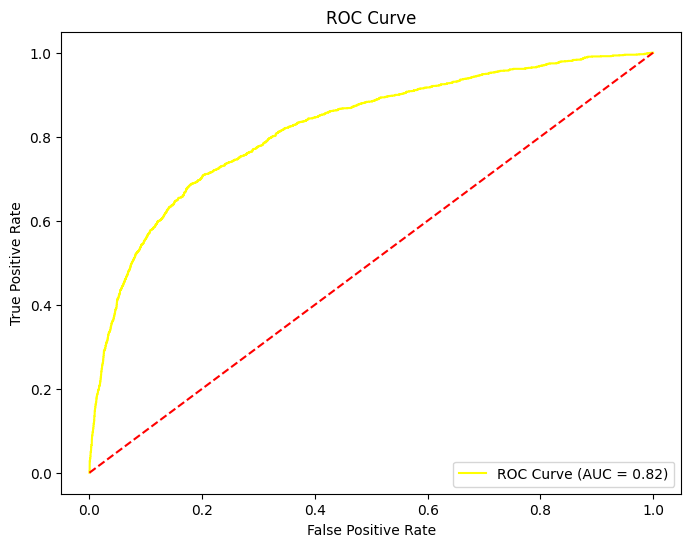

In [81]:
import matplotlib.pyplot as plt
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='yellow', label=f'ROC Curve (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

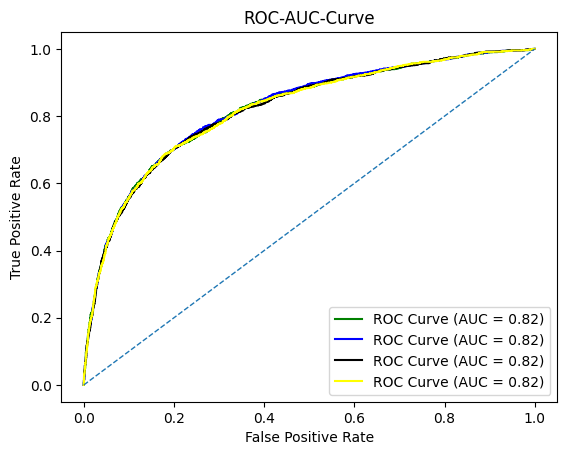

In [82]:
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_rus, tpr_rus, color='blue', label=f'ROC Curve (AUC = {roc_auc_rus:.2f})')
plt.plot(fpr_ros, tpr_ros, color='black', label=f'ROC Curve (AUC = {roc_auc_ros:.2f})')
plt.plot(fpr_smote, tpr_smote, color='yellow', label=f'ROC Curve (AUC = {roc_auc_smote:.2f})')

plt.plot([0,1],[0,1],linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC-AUC-Curve')
plt.show()

In [83]:
results = pd.DataFrame({'Model':[1,2,3,4],
                        'train_accuracy':[0.84,0.76,0.76,0.77], 
                        'test_accuracy':[0.84,0.77,0.78,0.78],
                        'Accuracy_score':[0.82,0.81,0.81,0.81],
                        'Recall_score':[0.61,0.64,0.62,0.63],
                        'Precision_score':[0.56,0.54,0.54,0.55],
                        'F1_score':[0.58,0.59,0.58,0.58],
                        'ROC_AUC_score':[0.82,0.82,0.82,0.82]})
results

,Model,train_accuracy,test_accuracy,Accuracy_score,Recall_score,Precision_score,F1_score,ROC_AUC_score
0,1,0.84,0.84,0.82,0.61,0.56,0.58,0.82
1,2,0.76,0.77,0.81,0.64,0.54,0.59,0.82
2,3,0.76,0.78,0.81,0.62,0.54,0.58,0.82
3,4,0.77,0.78,0.81,0.63,0.55,0.58,0.82


#### In this project we have only used Logistic Regression for predicting vaccine usage.
#### Almost all the Independent variables were categorical and contained missing values.
#### After cleaning and preprocessing the data total 4 models were created, In model 1 Imbalanced data was used as it is, UnderSampling is used in model 2, In model 3 Oversampling technique is used, In model 4  SMOTE is used.
#### Models performance is judged on basis of confusion matrix, classification report and other metrics.
#### Based on above results it is clear that model is performing better after using SMOTE.

#### Between models 2, 3, and 4, Model 2 is the best choice based on the following:

#### Recall: Model 2 has the highest recall score (0.64), which is important if you prioritize minimizing false negatives.
#### Test Accuracy: Model 2 has a competitive test accuracy (0.77) that is very close to models 3 and 4 (both at 0.78).
#### F1 Score: Model 2 has the highest F1 score (0.59), indicating a better balance between precision and recall.

#### While all models have the same ROC AUC score (0.82), Model 2 provides the best balance between recall, F1 score, and overall test accuracy, making it a solid choice.

In [84]:
import pickle
# Save the trained model
with open('trained_model.pkl', 'wb') as file:  # 'wb' stands for write binary
    pickle.dump(model_rus, file)

In [85]:
with open('trained_model.pkl', 'rb') as file:  # 'rb' stands for read binary
    loaded_model = pickle.load(file)

In [86]:
predictions = loaded_model.predict(x2_test)  # Replace X_test with your test data
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)